In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
%matplotlib inline

In [77]:
def logit(x):
    a = 1/(1+np.exp(-x))
    return a

In [22]:
n_samples = 100
np.random.seed(0)
mean = 10
X = np.random.exponential(mean, size=n_samples)

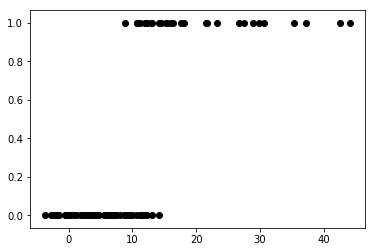

In [80]:
n_samples = 100
np.random.seed(0)
mean = 10
X = np.random.exponential(mean, size=n_samples)
y = (X >10 ).astype(np.float)
X += 3 * np.random.normal(size=n_samples)

X = X.reshape(-1,1)
plt.scatter(X, y, color = "black")

In [81]:
clf = linear_model.LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
clf.coef_

array([[0.30463023]])

In [83]:
clf.intercept_

array([-3.56072978])

In [84]:
X_test = np.linspace(0, 40, 300)

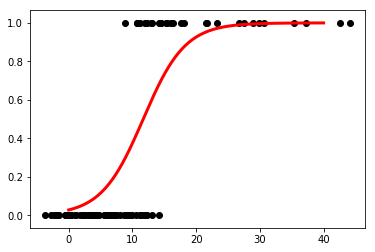

In [85]:
plt.scatter(X, y, color = "black")
pred = logit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, pred, color='red', linewidth=3)

In [86]:
ols = linear_model.LinearRegression()
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
ols.coef_

array([0.03581774])

In [88]:
ols.intercept_

-0.019706065850845333

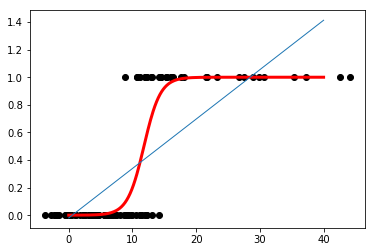

In [32]:
plt.scatter(X, y, color = "black")
plt.plot(X_test, pred, color='red', linewidth=3)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)

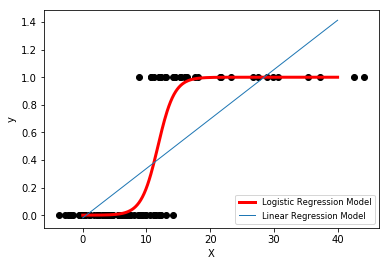

In [33]:
plt.scatter(X, y, color = "black")
plt.plot(X_test, pred, color='red', linewidth=3)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)

plt.ylabel('y')
plt.xlabel('X')
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')

# Credit Card credibility

In [34]:
raw_data = pd.read_csv("German_Credit_data.csv")
raw_data.head()

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18.0,4.0,2.0,1049.0,1.0,2.0,4.0,2.0,...,4.0,2,21.0,3.0,1.0,1.0,3.0,1.0,1.0,1
1,1,1,9.0,4.0,0.0,2799.0,1.0,3.0,2.0,3.0,...,2.0,1,36.0,3.0,1.0,2.0,3.0,2.0,1.0,1
2,1,2,12.0,2.0,9.0,841.0,2.0,4.0,2.0,2.0,...,4.0,1,23.0,3.0,1.0,1.0,2.0,1.0,1.0,1
3,1,1,12.0,4.0,0.0,2122.0,1.0,3.0,3.0,3.0,...,2.0,1,39.0,3.0,1.0,2.0,2.0,2.0,1.0,2
4,1,1,12.0,4.0,0.0,2171.0,1.0,3.0,4.0,3.0,...,4.0,2,38.0,1.0,2.0,2.0,2.0,1.0,1.0,2


In [89]:
y = raw_data["Creditability"]
data = raw_data.drop(["Creditability"], axis=1)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


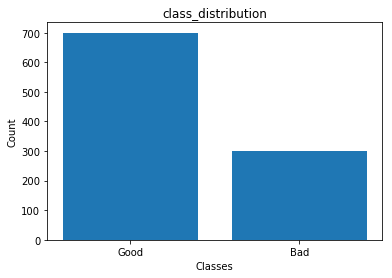

In [90]:
levels = np.arange(2)
count = np.array([sum(y), len(y)-sum(y)])
plt.bar(levels, count)
plt.ylabel('Count')
plt.xlabel('Classes')
plt.title('class_distribution')
plt.xticks(levels, ["Good", "Bad"])
plt.legend()   
plt.show()

In [37]:
data["Telephone"] = data['Telephone'].astype(str)
data["Status_of_existing_account"] = data['Status_of_existing_account'].astype(str)
data["Purpose_of_loan"] = data['Purpose_of_loan'].astype(str)
data["Property"] = data['Property'].astype(str)

In [94]:
data_cat = data[["Telephone", "Status_of_existing_account", "Purpose_of_loan", "Property"]]
data_cont  = data.drop(["Telephone", "Status_of_existing_account", "Purpose_of_loan", "Property"], axis=1)

In [95]:
data_cont.isnull().sum()

Duration_of_Credit_month                             11
Payment_Status_of_Previous_Credit(Credit_history)    10
Credit_Amount                                        24
Value_of_Savings_account&bonds                        1
Years_of_Present_Employment                           1
Percentage_of_disposable_income                       6
Sex_&_Marital_Status                                  6
Guarantors/Debtors                                    1
Duration_in_Present_Residence                         1
Age_in_years                                          7
Concurrent_Credits                                    6
Housing                                               4
No_of_Credits_at_this__Bank                           4
Occupation                                            1
No_of_dependents                                      3
Foreign_Worker                                        0
dtype: int64

In [96]:
data_cat.isnull().sum()

Telephone                     8
Status_of_existing_account    0
Purpose_of_loan               1
Property                      0
dtype: int64

In [97]:
total = data_cont.isnull().sum().sort_values(ascending = False)
percent = (data_cont.isnull().sum()/data_cont.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Credit_Amount,24,0.024
Duration_of_Credit_month,11,0.011
Payment_Status_of_Previous_Credit(Credit_history),10,0.010
Age_in_years,7,0.007
Concurrent_Credits,6,0.006
Sex_&_Marital_Status,6,0.006
Percentage_of_disposable_income,6,0.006
No_of_Credits_at_this__Bank,4,0.004
Housing,4,0.004
No_of_dependents,3,0.003


In [42]:
for i in data_cont.columns:
    if missing_data.loc[i]["Percent"] > 0.5:
        data_cont = data_cont.drop(i, axis = 1)
    else:
        data_cont[i] = data_cont[i].fillna(data_cont[i].median())

In [43]:
data_cont.isnull().sum() 

Duration_of_Credit_month                             0
Payment_Status_of_Previous_Credit(Credit_history)    0
Credit_Amount                                        0
Value_of_Savings_account&bonds                       0
Years_of_Present_Employment                          0
Percentage_of_disposable_income                      0
Sex_&_Marital_Status                                 0
Guarantors/Debtors                                   0
Duration_in_Present_Residence                        0
Age_in_years                                         0
Concurrent_Credits                                   0
Housing                                              0
No_of_Credits_at_this__Bank                          0
Occupation                                           0
No_of_dependents                                     0
Foreign_Worker                                       0
dtype: int64

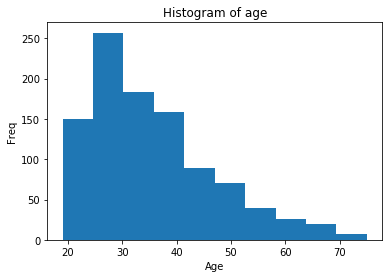

In [44]:
plt.hist(data_cont["Age_in_years"])
plt.xlabel("Age")
plt.ylabel("Freq")
plt.title("Histogram of age")
plt.show()

In [100]:
q = raw_data[raw_data["Age_in_years"]>40]

In [98]:
A = raw_data[raw_data["Age_in_years"]>40]["Creditability"]

In [46]:
sum(A)/len(A)

0.7323420074349443

In [47]:
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [48]:
data_cat_dummies.shape

(1000, 18)

In [49]:
print("Numerical features : " + str(len(data_cont.columns)))
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Numerical features : 16
Categorical features : 18


In [50]:
finaldata = pd.concat([data_cont, data_cat_dummies], axis=1)

In [51]:
from sklearn.cross_validation import train_test_split
x_train1,x_test1, y_train1, y_test1 = train_test_split(finaldata, y, test_size = 0.30)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logreg = LogisticRegression()

In [54]:
logreg.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
y_train_pred = logreg.predict(x_train1)

In [56]:
sum(y_train1 == y_train_pred)/len(y_train1)

0.7742857142857142

In [57]:
logreg.score(x_train1, y_train1)

0.7742857142857142

In [58]:
logreg.score(x_test1, y_test1)

0.7566666666666667

In [59]:
y_test_pred = logreg.predict(x_test1)

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_pred, y_test1)

In [61]:
cm

array([[ 35,  22],
       [ 51, 192]], dtype=int64)

In [62]:
## Effect of removing random seed

In [63]:
## Class weights - 1

In [64]:
logreg = LogisticRegression(class_weight= {0:0.5, 1:2})

In [65]:
logreg.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight={0: 0.5, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [66]:
logreg.score(x_train1, y_train1)

0.7228571428571429

In [67]:
logreg.score(x_test1, y_test1)

0.7433333333333333

In [68]:
y_test_pred = logreg.predict(x_test1)

In [69]:
cm = confusion_matrix(y_test_pred, y_test1)
cm

array([[ 11,   2],
       [ 75, 212]], dtype=int64)

In [70]:
## Class weights - 2

In [71]:
logreg = LogisticRegression(class_weight= {0:0.5, 1:10})

In [72]:
logreg.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight={0: 0.5, 1: 10}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [73]:
logreg.score(x_train1, y_train1)

0.6957142857142857

In [74]:
logreg.score(x_test1, y_test1)

0.7166666666666667

In [75]:
y_test_pred = logreg.predict(x_test1)

In [76]:
cm = confusion_matrix(y_test_pred, y_test1)
cm

array([[  1,   0],
       [ 85, 214]], dtype=int64)